**Names of all group members:** Ramon Kaspar, Cyrill Stotz

In [152]:
# Exercise 1.
import numpy as np
np.random.seed(0)  # for reproducibility

# simulate explanatory variables x
m = 20000
n = 10000

x1 = np.random.uniform(18, 80, m+n)
x2 = np.random.uniform(1, 15, m+n)
x3 = np.random.binomial(1, 0.1, m+n)
vectors = np.column_stack((x1, x2, x3))

# a) calculate empirical means and standard deviations over training data
training_data = vectors[:m]
ages = training_data[:, 0]
incomes = training_data[:, 1]
employment_status = training_data[:, 2]

mean_age = np.mean(ages)
std_age = np.std(ages)
print("Age (mean, std):", mean_age, std_age)

mean_income = np.mean(incomes)
std_income = np.std(incomes)
print("Income (mean, std):", mean_income, std_income)

mean_employment_status = np.mean(employment_status)
std_employment_status = np.std(employment_status)
print("Employment status (mean, std):", mean_employment_status, std_employment_status)

# b) Can you come up with a few (2 or 3) additional features that may be relevant?
# (you don't have to implement those of course, just write down your answer in text)
# (1) Amount of the loan requested from the bank
# (2) Ratio from debt to income
# (3) Duration of employment

Age (mean, std): 48.74265389697123 18.0074382841933
Income (mean, std): 7.986522193349889 4.030802860686146
Employment status (mean, std): 0.1017 0.30225338707779603


In [153]:
# Exercise 2.
# Building the datasets:

sigmoid = lambda x: 1. / (1. + np.exp(-x))

# \xi is uniformly distributed on (0,1)
xi = np.random.uniform(0, 1, m + n)

# build the first dataset
def p1(x):
    return sigmoid(13.3 - 0.33 * x[0] + 3.5 * x[1] - 3 * x[2])

y1 = np.zeros(m+n)
for i in range(m+n):
    if xi[i] <= p1(vectors[i]):
        y1[i] = 1

dataset1 = np.column_stack((vectors, y1))

# build the second dataset
def p2(x):
    age_threshold = 1 * (x[0] < 25) + 1 * (x[0] > 75)
    return sigmoid(5 - 10 * age_threshold + 1.1 * x[1] - x[2])

y2 = np.zeros(m+n)
for i in range(m+n):
    if xi[i] <= p2(vectors[i]):
        y2[i] = 1

dataset2 = np.column_stack((vectors, y2))
        
assert dataset1.shape == (m+n, 4) and dataset2.shape == (m+n, 4)

# Print some statistics about the datasets
print("Dataset1: Number of 'good' borrowers:", np.sum(dataset1[:, 3]))
print("Dataset2: Number of 'good' borrowers:", np.sum(dataset2[:, 3]))

Dataset1: Number of 'good' borrowers: 28553.0
Dataset2: Number of 'good' borrowers: 28477.0


In [154]:
# Exercise 2. a)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# "model = LogisticRegression().fit(X_data, Y_data)" fits a model
# "pred_X = model.predict_proba(X)" evaluates the model
# (note that it outputs both P(Y=0|X) and P(Y=1|X))
# "log_loss(Y, pred_X)" evaluates the negative conditional log likelihood (also called cross-entropy loss)

# Create the datasets (split into traind and test, split X and y)
X_train1 = dataset1[:m, :3]
y_train1 = dataset1[:m, 3]
X_test1 = dataset1[m:, :3]
y_test1 = dataset1[m:, 3]

X_train2 = dataset2[:m, :3]
y_train2 = dataset2[:m, 3]
X_test2 = dataset2[m:, :3]
y_test2 = dataset2[m:, 3]

# Fit the models on both datasets
model1 = LogisticRegression().fit(X_train1, y_train1)
model2 = LogisticRegression().fit(X_train2, y_train2)

# Calculate cross-entropy loss on both datasets for train and test
pred_train1 = model1.predict_proba(X_train1)
pred_test1 = model1.predict_proba(X_test1)
loss_train1 = log_loss(y_train1, pred_train1)
loss_test1 = log_loss(y_test1, pred_test1)
print("Train Loss LogReg (Dataset1): ", loss_train1)
print("Test Loss LogReg (Dataset1): ", loss_test1)

pred_train2 = model2.predict_proba(X_train2)
pred_test2 = model2.predict_proba(X_test2)
loss_train2 = log_loss(y_train2, pred_train2)
loss_test2 = log_loss(y_test2, pred_test2)
print("Train Loss LogReg (Dataset2): ", loss_train2)
print("Test Loss LogReg (Dataset2): ", loss_test2)

Train Loss LogReg (Dataset1):  0.02965714449391659
Test Loss LogReg (Dataset1):  0.03486030904708868
Train Loss LogReg (Dataset2):  0.15353916049547306
Test Loss LogReg (Dataset2):  0.14864431254820357


In [155]:
# Exercise 2. b)
# Calculate normalized data
# We use the empirical standard deviations from task 1
X_train1_normalized = X_train1 / [std_age, std_income, std_employment_status]
X_test1_normalized = X_test1 / [std_age, std_income, std_employment_status]

X_train2_normalized = X_train2 / [std_age, std_income, std_employment_status]
X_test2_normalized = X_test2 / [std_age, std_income, std_employment_status]


In [156]:
# Exercise 2.b) (i) and (ii)
from sklearn.svm import SVC
# "model = SVC(kernel='rbf', gamma=GAMMA, C=C, probability=True)" creates
# a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter C (note the relation between C and the parameter lambda from the lecture).
# "probability=True" enables the option "model.predict_proba(X)" to predict probabilities from the regression function \hat{f}^{svm}.
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)

# Fit the models for both datasets (this can take up to 60 seconds with SVC)

# RBF Kernel: k(x, x') = exp(-gamma ||x - x'||^2 )
# Therefore, k(x, x') = exp(-1/10 * ||x - x'||^2) is an RBF kernel with gamma = 1/10
svm1 = SVC(kernel='rbf', gamma=1/10, C=0.2, probability=True)
svm1.fit(X_train1_normalized, y_train1)

svm2 = SVC(kernel='rbf', gamma=1/10, C=0.2, probability=True)
svm2.fit(X_train2_normalized, y_train2)

# NOTE: We have to use Platt sclaing to fit a logistic regression function on top of the SVM output.
# Since we used `probability=True`, it automatically uses Platt scaling when calling `predict_proba()`.
# Source: https://scikit-learn.org/dev/modules/svm.html#scores-and-probabilities

SVC(C=0.2, gamma=0.1, probability=True)

In [157]:
# Exercise 2.b (iii)
# "model.predict_proba(X)" predicts probabilities from features (note that it outputs both P(Y=0|X) and P(Y=1|X))

# Calculate cross-entropy loss on both datasets for train and test
pred_train_svm1 = svm1.predict_proba(X_train1_normalized)
pred_test_svm1 = svm1.predict_proba(X_test1_normalized)
loss_train_svm1 = log_loss(y_train1, pred_train_svm1)
loss_test_svm1 = log_loss(y_test1, pred_test_svm1)
print("Train Loss SVM (Dataset1): ", loss_train_svm1)
print("Test Loss SVM (Dataset1): ", loss_test_svm1)

pred_train_svm2 = svm2.predict_proba(X_train2_normalized)
pred_test_svm2 = svm2.predict_proba(X_test2_normalized)
loss_train_svm2 = log_loss(y_train2, pred_train_svm2)
loss_test_svm2 = log_loss(y_test2, pred_test_svm2)
print("Train Loss SVM (Dataset2): ", loss_train_svm2)
print("Test Loss SVM (Dataset2): ", loss_test_svm2)

Train Loss SVM (Dataset1):  0.03190722918660561
Test Loss SVM (Dataset1):  0.03877385896758385
Train Loss SVM (Dataset2):  0.07108349621551922
Test Loss SVM (Dataset2):  0.06706802419521743


AUC Logistic Regression (Dataset1):  0.00031636405899814125
AUC Logistic Regression (Dataset2):  0.007945111888088895
AUC RKHS Regression (SVM) (Dataset1):  0.0003317610951298546
AUC RKHS Regression (SVM) (Dataset2):  0.0010624984329034469


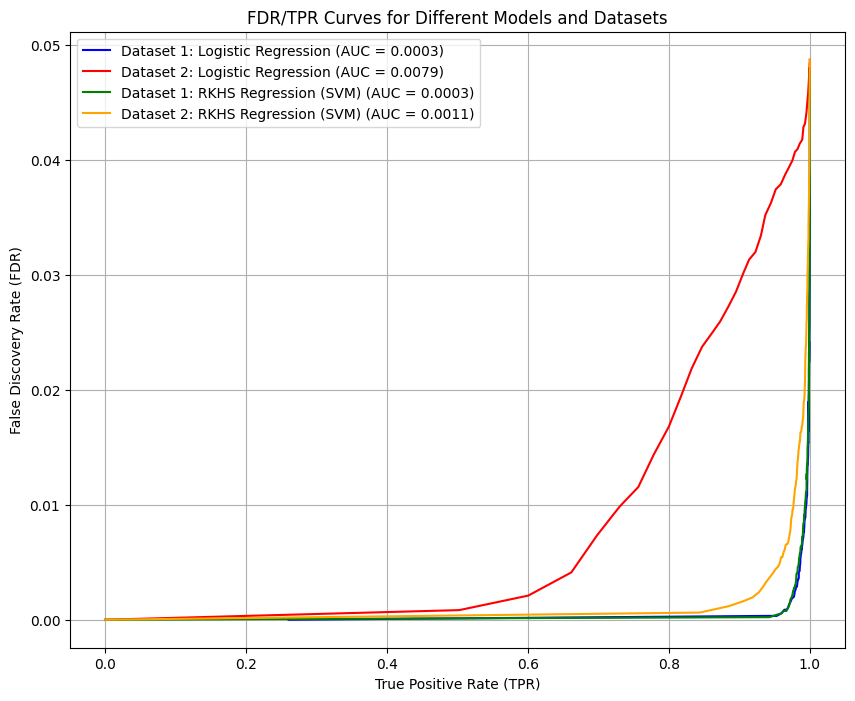

In [158]:
# Exercise 2.c
import matplotlib.pyplot as plt
# To calculate the curves, it is fine to take 100 threshold values c, i.e.,
ths = np.linspace(0, 1, 100)

# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)

def calculate_FDR_TPR_AUC(y_true, y_probabilities):
    """
    Calculates FDR/TPR-curve (i.e., FPR vs. TPR curve for different thresholds) and the AUC.
    Note that we have y_probabilities[i] = (P(Y_i=0|X), P(Y_i=1|X))
    """
    assert y_true.shape[0] == y_probabilities.shape[0]
    
    # Calculate positives / negatives (only depending on the dataset)
    positives = np.sum(y_true)
    
    TPR = []
    FDR = []
    
    # Calculate true positives and false positives for all threshold values
    true_positives = []
    false_positives = []
    for th in ths:
        tp = 0
        fp = 0
        for i in range(len(y_probabilities)):
            if y_probabilities[i, 1] >= th:
                if y_true[i] == 1:
                    tp += 1
                else:
                    fp += 1
        # Calculate FDR and TPR rate (points on the FDR/TPR curve) and the AUC
        # FDR = FP/(FP + TP), TPR = TP/P
        tpr = tp / positives if positives > 0 else 0  # True Positive Rate (TPR)
        fdr = fp / (fp + tp) if (fp + tp) > 0 else 0  # False Discovery Rate (FDR)
        TPR.append(tpr)
        FDR.append(fdr)
    
    # Sort FDR and TPR arrays based on TPR, such that we can calculate the AUC (we need monotonically increasing FDR)
    TPR = np.array(TPR)
    FDR = np.array(FDR)
    sorted_indices = np.argsort(TPR)
    FDR = FDR[sorted_indices]
    TPR = TPR[sorted_indices]
    
    # We use Riemann sums to approximate the AUC
    # NOTE: Here a lower AUC is better (i.e., we want to minimize FDR (losses) and maximize TPR (business volume))
    AUC = 0
    for i in range(len(FDR) - 1):
        AUC += (FDR[i] + FDR[i+1]) / 2 * (TPR[i+1] - TPR[i])
    
    return FDR, TPR, AUC

def plot_combined_fdr_tpr_curves():
    """Sets up the combined plot for all FDR/TPR curves"""
    plt.figure(figsize=(10, 8))
    plt.ylabel('False Discovery Rate (FDR)')
    plt.xlabel('True Positive Rate (TPR)')
    plt.title('FDR/TPR Curves for Different Models and Datasets')
    plt.grid(True)
    
plot_combined_fdr_tpr_curves()

# first data set & logistic regression:
FDR_lr1, TPR_lr1, AUC_lr1 = calculate_FDR_TPR_AUC(y_test1, pred_test1)
print("AUC Logistic Regression (Dataset1): ", AUC_lr1)
plt.plot(TPR_lr1, FDR_lr1, label=f"Dataset 1: Logistic Regression (AUC = {AUC_lr1:.4f})", color="blue")

# second dataset & logistic regression
FDR_lr2, TPR_lr2, AUC_lr2 = calculate_FDR_TPR_AUC(y_test2, pred_test2)
print("AUC Logistic Regression (Dataset2): ", AUC_lr2)
plt.plot(TPR_lr2, FDR_lr2, label=f"Dataset 2: Logistic Regression (AUC = {AUC_lr2:.4f})", color="red")

# first data set and rkhs regression (SVM with RBF kernel):
FDR_svm1, TPR_svm1, AUC_svm1 = calculate_FDR_TPR_AUC(y_test1, pred_test_svm1)
print("AUC RKHS Regression (SVM) (Dataset1): ", AUC_svm1)
plt.plot(TPR_svm1, FDR_svm1, label=f"Dataset 1: RKHS Regression (SVM) (AUC = {AUC_svm1:.4f})", color="green")

# second data set and rkhs regression (SVM with RBF kernel)
FDR_svm2, TPR_svm2, AUC_svm2 = calculate_FDR_TPR_AUC(y_test2, pred_test_svm2)
print("AUC RKHS Regression (SVM) (Dataset2): ", AUC_svm2)
plt.plot(TPR_svm2, FDR_svm2, label=f"Dataset 2: RKHS Regression (SVM) (AUC = {AUC_svm2:.4f})", color="orange")

plt.legend()
plt.savefig("plots/FDR_TPR_curves.pdf", format="pdf")
plt.show()

== Scenario 1 ==
Expected profit/loss: 22360.0648
95%-VaR: 2455.0

== Scenario 2 ==
Expected profit/loss: 4874.9698
95%-VaR: -6840.0

== Scenario 3 ==
Expected profit/loss: 61939.6574
95%-VaR: 54070.0


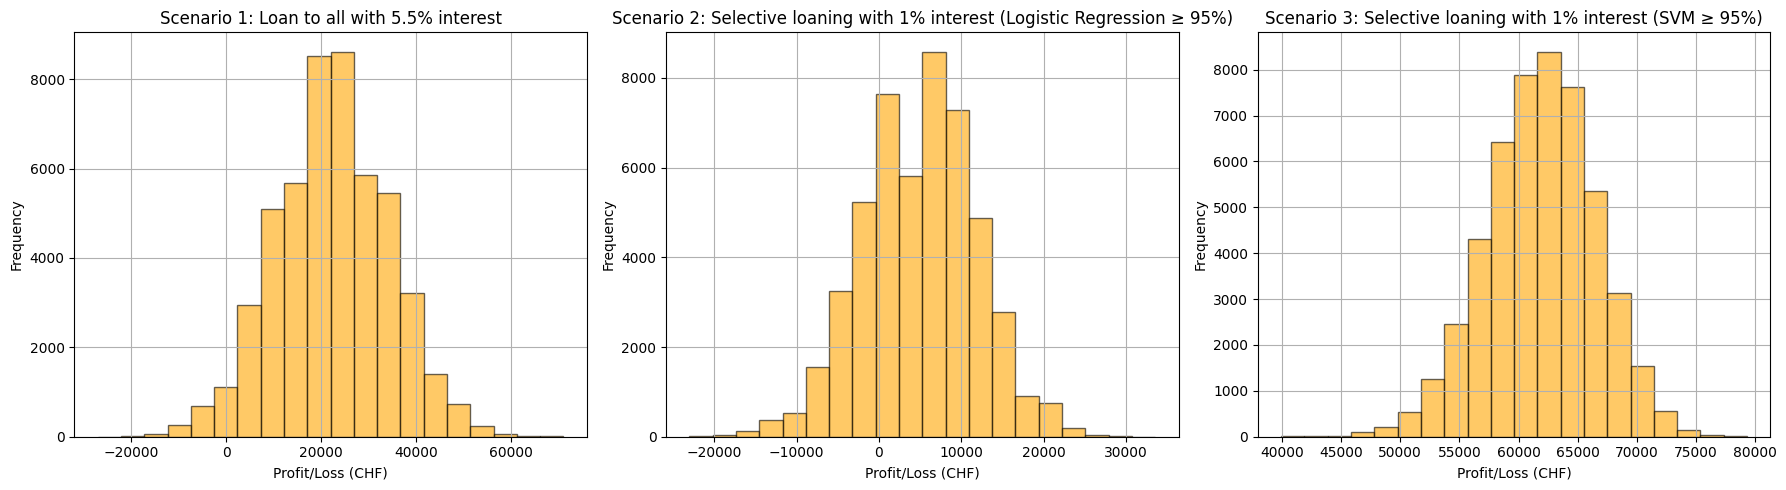

In [159]:
# Exercise 3.

# Set model parameters and define matrix D
n = len(y_test2) # Should be 10'000
num_scenarios = 50000  # Number of market scenarios
loan_amount = 1000  # Loan amount (in CHF)
interest_rate_1 = 0.055  # Interest rate for strategy 1
interest_rate_2 = 0.01  # Interest rate for strategy 2 and 3
interest_rate_3 = 0.01
profit_paid_back_1 = loan_amount * interest_rate_1
profit_paid_back_2 = loan_amount * interest_rate_2
profit_paid_back_3 = loan_amount * interest_rate_3

A = np.random.uniform(0, 1, (n, num_scenarios))
# B is a matrix where each column is p2[i] dimension n x j
p2_values = np.array([p2(vectors[i]) for i in range(m, m + n)])
B = np.tile(p2_values, (num_scenarios, 1)).T
#Define the matrix D which is 1 if the entry of A is smaller equel than p2[i+m]  and 0 otherwise
D = np.where(A <= B, 1, 0)

def plot_histogram(ax, profits, title):
    """Helper function to plot histogram of profits and losses."""
    ax.hist(profits, bins=20, alpha=0.6, color='orange', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Profit/Loss (CHF)')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    
def calculate_profits_and_var(profits):
    """Helper function to calculate expected profit/loss and 95%-VaR"""
    expected_profit = np.mean(profits)
    var_95 = np.percentile(profits, 5)
    return expected_profit, var_95

# == Scenario 1: Loan to all with 5.5% interest==
print("== Scenario 1 ==")
profits_scenario_1 = np.sum(D * profit_paid_back_1 - (1-D)*1000, axis=0)
expected_profit_1, var_95_1 = calculate_profits_and_var(profits_scenario_1)
print("Expected profit/loss:", expected_profit_1)
print("95%-VaR:", var_95_1)

# == Scenario 2: Selective loaning with 1% interest (Logistic Regression >= 95%)==
print("\n== Scenario 2 ==")
factor_1 = np.where(pred_test2[:, 1] >= 0.95, 1, 0)
profits_scenario_2 = np.sum(
    factor_1[:, np.newaxis] * (D * profit_paid_back_2 - (1 - D) * loan_amount),
    axis=0
)
expected_profit_2, var_95_2 = calculate_profits_and_var(profits_scenario_2)
print("Expected profit/loss:", expected_profit_2)
print("95%-VaR:", var_95_2)

# == Scenario 3: Selective loaning with 1% interest (SVM >= 95%)==
print("\n== Scenario 3 ==")
factor_2 = np.where(pred_test_svm2[:, 1] >= 0.95, 1, 0)
profits_scenario_3 = np.sum(
    factor_2[:, np.newaxis] * (D * profit_paid_back_3 - (1 - D) * loan_amount),
    axis=0
)
expected_profit_3, var_95_3 = calculate_profits_and_var(profits_scenario_3)
print("Expected profit/loss:", expected_profit_3)
print("95%-VaR:", var_95_3)

# Plot histogram of profits and losses
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_histogram(axes[0], profits_scenario_1, "Scenario 1: Loan to all with 5.5% interest")
plot_histogram(axes[1], profits_scenario_2, "Scenario 2: Selective loaning with 1% interest (Logistic Regression ≥ 95%)")
plot_histogram(axes[2], profits_scenario_3, "Scenario 3: Selective loaning with 1% interest (SVM ≥ 95%)")
plt.tight_layout()
plt.savefig("plots/profit_loss_scenarios.pdf", format="pdf")
plt.show()

### Conclusion
- Highest expected profit is 61'939 CHF, achieved by Strategy 3. This strategy also has a high stability with a 95%-VaR of 54'070 CHF, indicating low risk of loss.
- Strategy 1 yields the second-highest expected profit of 22'360 CHF, with a moderate risk level (95%-VaR of 2'455 CHF).
- Strategy 2 shows a significantly lower expected profit of 4'874 CHF and presents a 95%-VaR of -6'840 CHF, indicating a higher risk of substantial losses, making it less effective.